In [1]:
import os
import keras
import numpy as np
from glob import glob
from tqdm import tqdm 

# Data
from keras.preprocessing.image import ImageDataGenerator

# Data Viz
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Model
import tensorflow as tf
from keras import Sequential
from keras.models import load_model
from keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout

# Callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Transfer Learning Models
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception, ResNet152, ResNet152V2

In [2]:
# Main Path
path = 'data'

# Get Class Names
class_names = sorted(os.listdir(path))
n_classes = len(class_names)
print(f"Class Names: \n{class_names}")
print(f"Total Number of Classes : {n_classes}")

Class Names: 
['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Total Number of Classes : 10


In [3]:
batch_size = 32
img_height = 128
img_width = 128

In [4]:
# Initialize Generator 
gen = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True, 
    vertical_flip=True, 
    rotation_range=20, 
    validation_split=0.2)

# Load data
train_ds = gen.flow_from_directory(
    path, 
    target_size=(256,256), 
    class_mode='binary', 
    batch_size=32, 
    shuffle=True, 
    subset='training')

valid_ds = gen.flow_from_directory(
    path, 
    target_size=(256,256), 
    class_mode='binary', 
    batch_size=32, 
    shuffle=True, 
    subset='validation')

Found 2603 images belonging to 10 classes.
Found 645 images belonging to 10 classes.


In [5]:
def show_image(img, title=None):
    '''The function takes in a Image and plots it'''
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

In [6]:
def get_random_data(data):
    images, labels = data
    id = np.random.randint(len(images))
    image, label = images[id], labels[id]
    return image, label

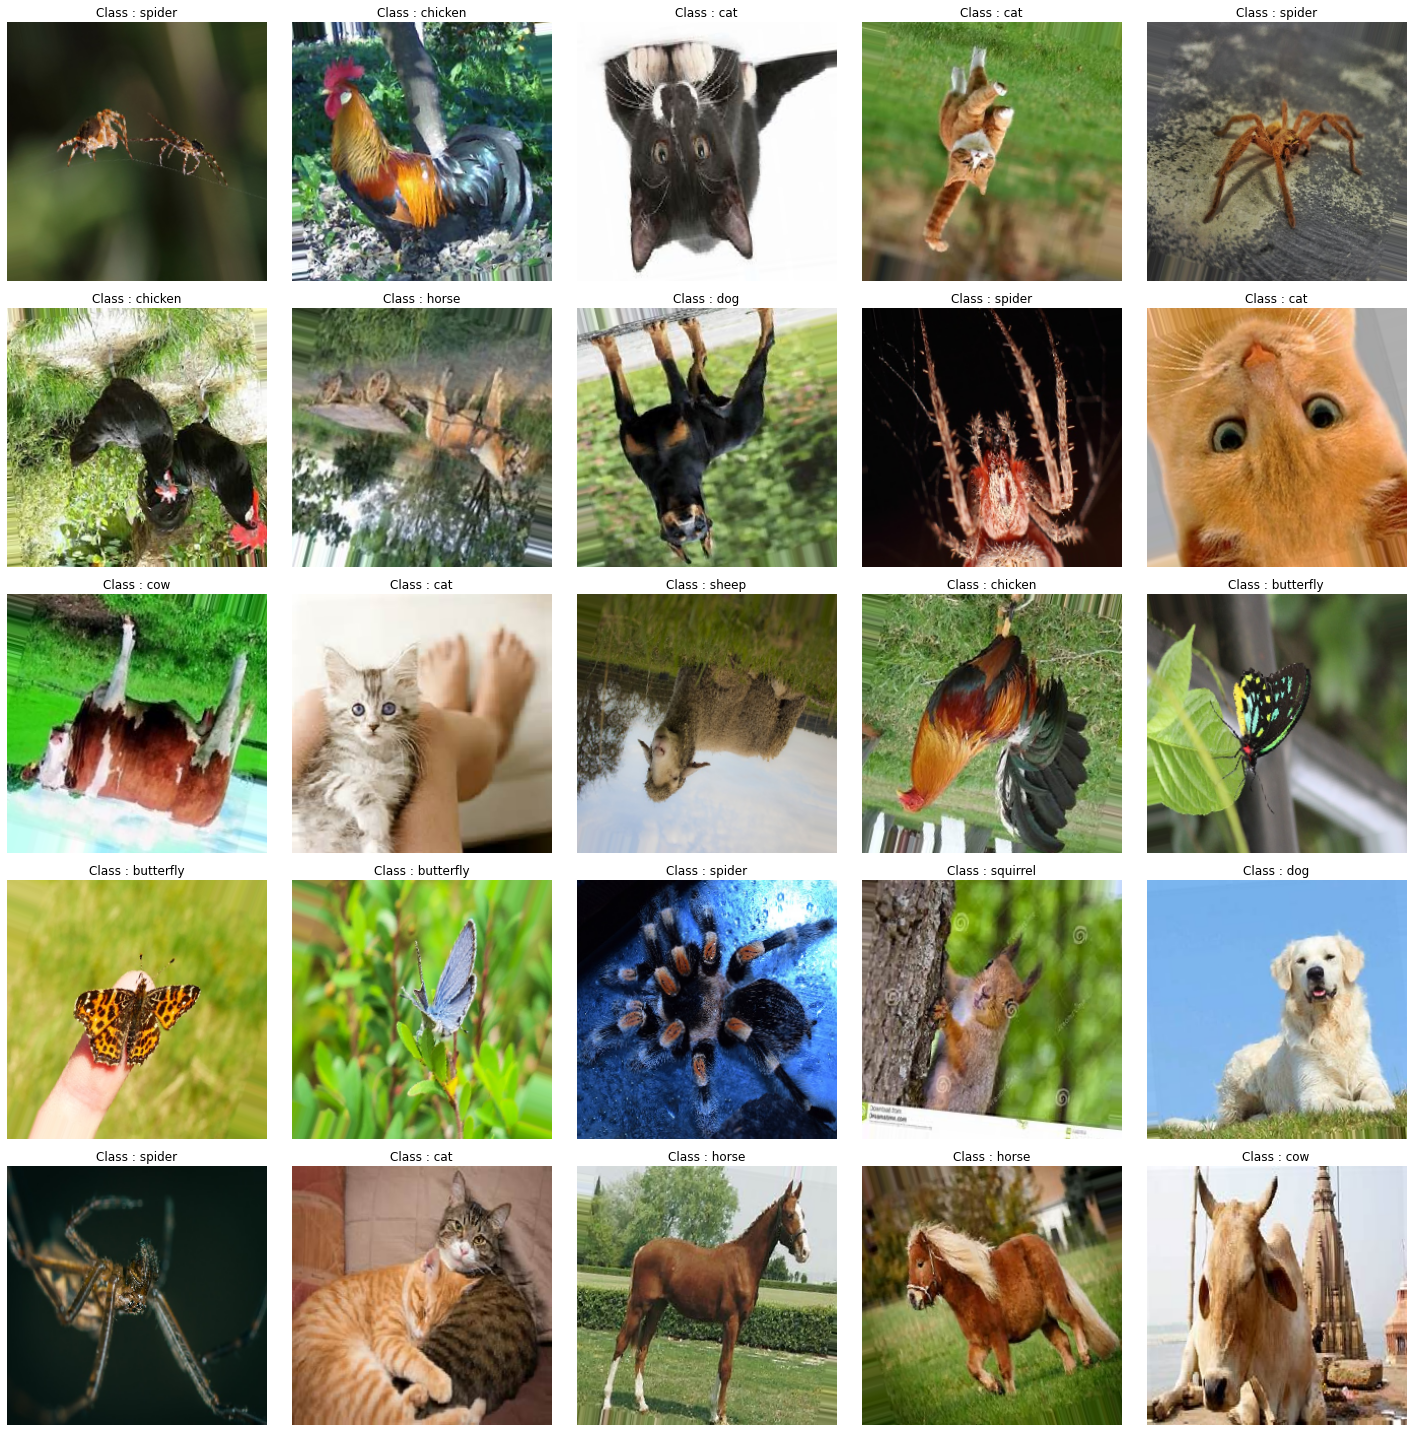

In [7]:
plt.figure(figsize=(20,20))
i=1
for images, labels in iter(train_ds):
    
    # Get Random Image and label
    image, label = get_random_data([images, labels])
    
    # Plot it
    plt.subplot(5,5,i)
    show_image(image, title=f"Class : {class_names[int(label)]}")
    
    # Make sure to end the Loop
    i+=1
    if i>=26: break
        

plt.tight_layout()
plt.show()

In [8]:
num_classes = 10

model = tf.keras.Sequential([
  #tf.keras.layers.Rescaling(1./127),
  tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=(256,256,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
    

  tf.keras.layers.Dense(num_classes,activation="softmax")
])


Metal device set to: Apple M1


2023-01-04 16:37:41.492286: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-04 16:37:41.492385: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [10]:
hist = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=20
)

Epoch 1/20


2023-01-04 16:37:41.916905: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2023-01-04 16:37:42.208546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - ETA: 0s - loss: 2.2745 - accuracy: 0.1260

2023-01-04 16:38:15.397639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 38s 454ms/step - loss: 2.2745 - accuracy: 0.1260 - val_loss: 2.1821 - val_accuracy: 0.1814
Epoch 2/20
82/82 [==============================] - 37s 448ms/step - loss: 2.0846 - accuracy: 0.2213 - val_loss: 2.0241 - val_accuracy: 0.2884
Epoch 3/20
82/82 [==============================] - 404s 5s/step - loss: 1.9365 - accuracy: 0.2774 - val_loss: 1.9788 - val_accuracy: 0.2868
Epoch 4/20
82/82 [==============================] - 39s 471ms/step - loss: 1.8902 - accuracy: 0.3081 - val_loss: 1.8448 - val_accuracy: 0.3333
Epoch 5/20
82/82 [==============================] - 39s 475ms/step - loss: 1.7339 - accuracy: 0.3538 - val_loss: 1.7175 - val_accuracy: 0.3845
Epoch 6/20
82/82 [==============================] - 38s 464ms/step - loss: 1.6462 - accuracy: 0.4088 - val_loss: 1.7359 - val_accuracy: 0.3798
Epoch 7/20
82/82 [==============================] - 38s 458ms/step - loss: 1.5454 - accuracy: 0.4303 - val_loss: 1.6679 - val_accuracy: 0.3860
Epoch 8/20
8

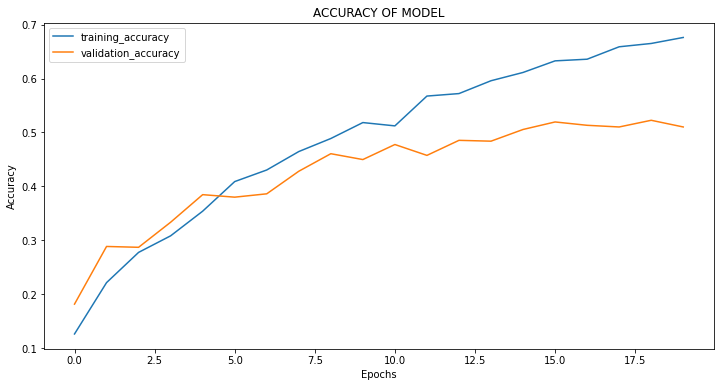

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY OF MODEL")
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

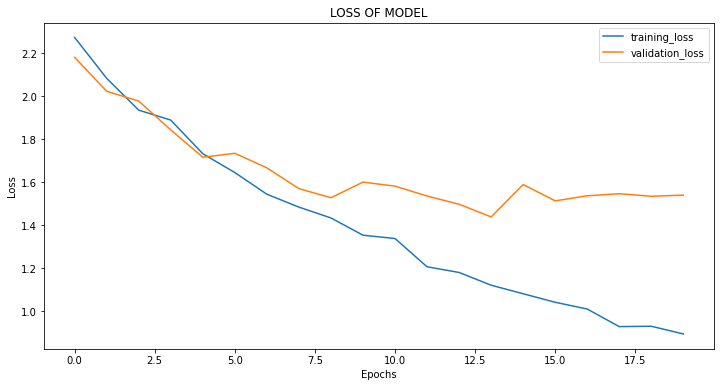

In [12]:
# loss of our model
plt.figure(figsize=(12, 6))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS OF MODEL")
plt.legend(['training_loss', 'validation_loss'])
plt.show()

1/1 [==============================] - 0s 220ms/step


2023-01-04 16:56:37.625871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 8ms/step


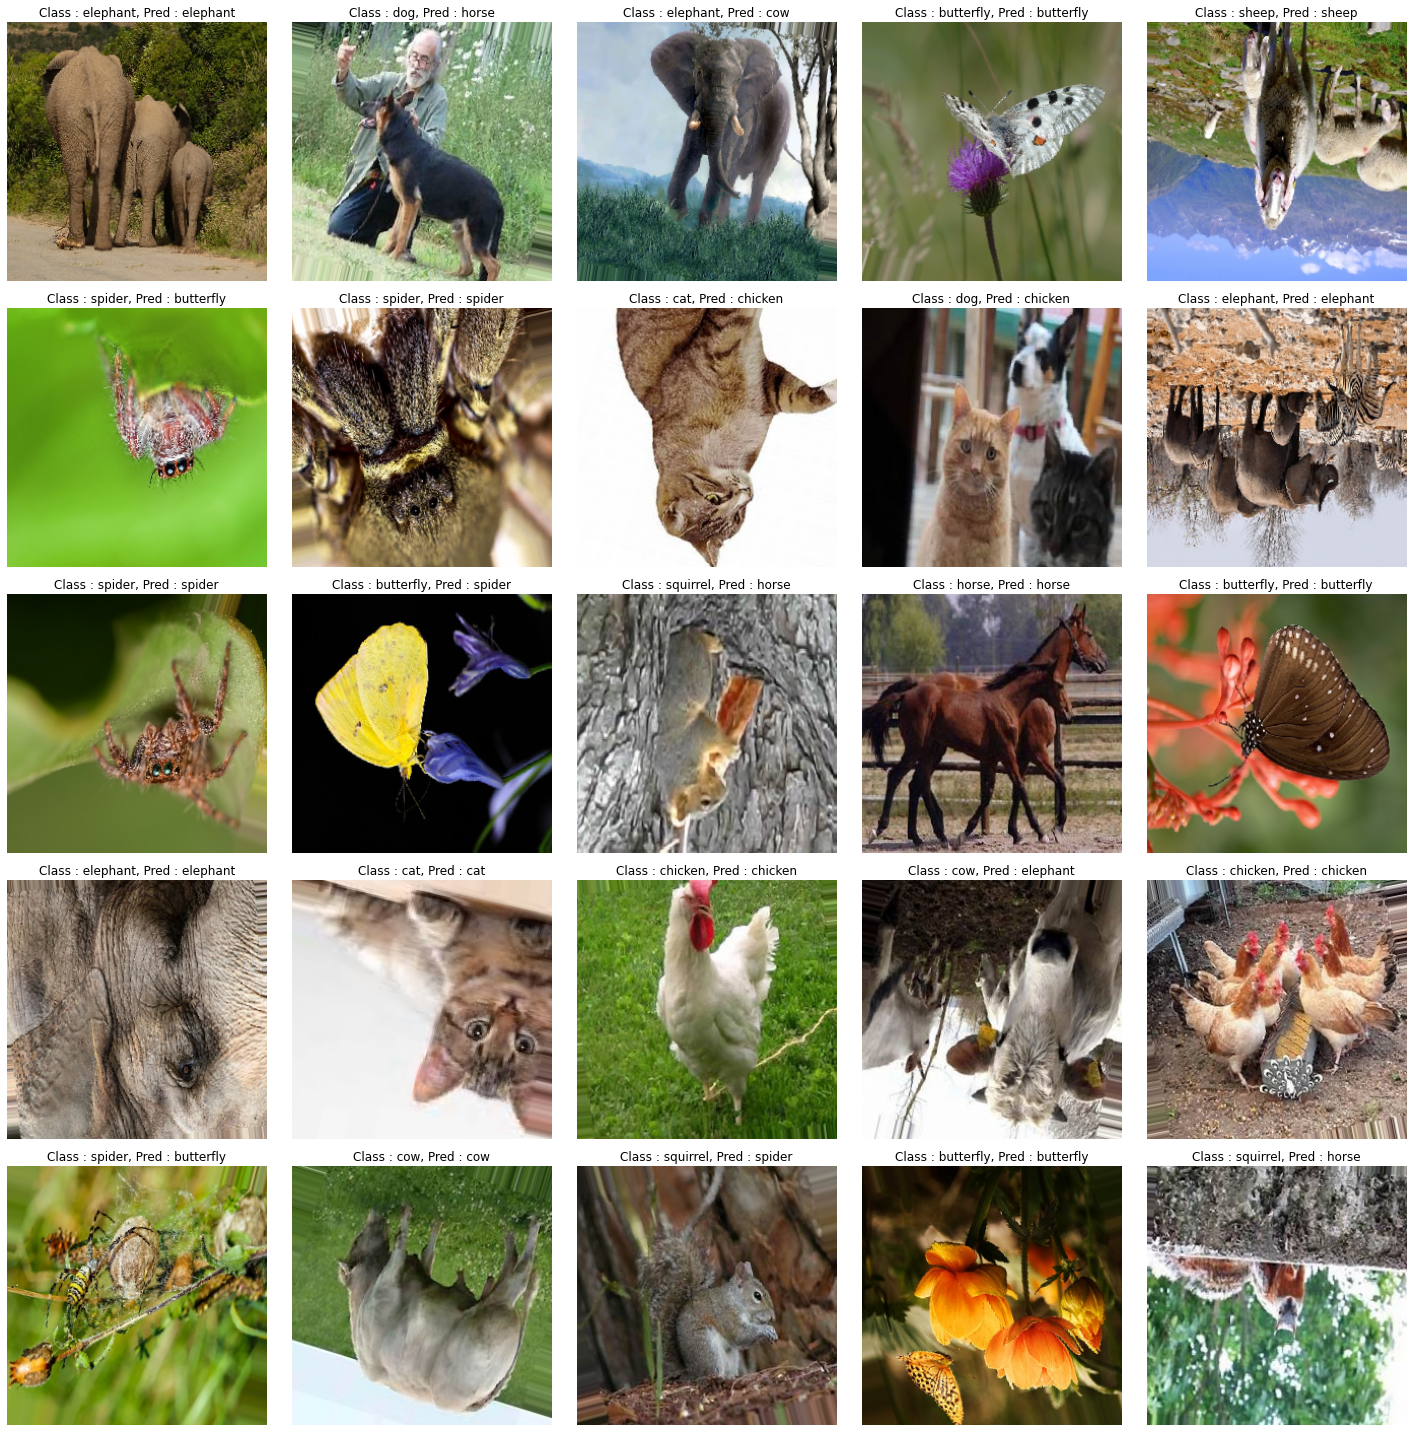

In [13]:
#Testing the model
plt.figure(figsize=(20,20))
i=1
for images, labels in iter(valid_ds):
    
    # Get Random Image and label
    image, label = get_random_data([images, labels])
    pred_label = class_names[np.argmax(model.predict(image[np.newaxis,...]))]
    
    # Plot it
    plt.subplot(5,5,i)
    show_image(image, title=f"Class : {class_names[int(label)]}, Pred : {pred_label}")
    
    # Make sure to end the Loop
    i+=1
    if i>=26: break
        

plt.tight_layout()
plt.show()